# **Common code**

In [ ]:
# Connect the colab notebook with drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import RandomizedSearchCV
import xgboost


In [ ]:
dataset =  pd.read_csv("/content/drive/MyDrive/Customer_Churn/Cleaned_data_24_10_22.csv")
dataset.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df = dataset[['Geography', 'Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','Exited']].copy()
df.head(5)

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,0,0,42,2,0.00,1,1,1,1
1,2,0,41,1,83807.86,1,0,1,0
2,0,0,42,8,159660.80,3,1,0,1
3,0,0,39,1,0.00,2,0,0,0
4,2,0,43,2,125510.82,1,1,1,0


In [ ]:
df.shape

(15682, 9)

In [ ]:
X = dataset.drop(['Exited'],axis=1)
y = dataset['Exited']

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
classifier = xgboost.XGBClassifier()

params = {
 'learning_rate' : [0.05,0.10,0.15,0.20,0.25,0.30],
 'max_depth' : [ 3, 4, 5, 6, 8, 10, 12, 15],
 'min_child_weight' : [ 1, 3, 5, 7 ],
 'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 'colsample_bytree' : [ 0.3, 0.4, 0.5 , 0.7 ]
}

# **Repeatable 50:50**

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.50, random_state=1)

In [ ]:
xgb_model1=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=10,verbose=3)
xgb_model1.fit(X_train1,y_train1)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


RandomizedSearchCV(cv=10, estimator=XGBClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [ ]:
print("\n The best parameters across ALL searched params:\n", xgb_model1.best_params_)


 The best parameters across ALL searched params:
 {'min_child_weight': 3, 'max_depth': 6, 'learning_rate': 0.15, 'gamma': 0.3, 'colsample_bytree': 0.4}


In [ ]:
xgb_cv_predict_train1 = xgb_model1.predict(X_train1)
print("Accuracy against training data: {0:.4f}".format(metrics.accuracy_score(y_train1, xgb_cv_predict_train1)))
print()

Accuracy against training data: 0.9003



In [ ]:
xgb_cv_predict_test1 = xgb_model1.predict(X_test1)
print("Accuracy against test data: {0:.4f}".format(metrics.accuracy_score(y_test1, xgb_cv_predict_test1)))
print()

Accuracy against test data: 0.8487



In [ ]:
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test1, xgb_cv_predict_test1))
print()

Confusion Matrix
[[3348  552]
 [ 634 3307]]



In [ ]:
print("Classification Report")
print(metrics.classification_report(y_test1, xgb_cv_predict_test1))
print()

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      3900
           1       0.86      0.84      0.85      3941

    accuracy                           0.85      7841
   macro avg       0.85      0.85      0.85      7841
weighted avg       0.85      0.85      0.85      7841




# **Repeatable 80:20**

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.20, random_state=1)

In [ ]:
xgb_model2=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=10,verbose=3)
xgb_model2.fit(X_train2,y_train2)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


RandomizedSearchCV(cv=10, estimator=XGBClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [ ]:
print("\n The best parameters across ALL searched params:\n", xgb_model2.best_params_)


 The best parameters across ALL searched params:
 {'min_child_weight': 1, 'max_depth': 8, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.7}


In [ ]:
xgb_cv_predict_train2 = xgb_model2.predict(X_train2)
print("Accuracy against training data: {0:.4f}".format(metrics.accuracy_score(y_train2, xgb_cv_predict_train2)))
print()

Accuracy against training data: 0.9750



In [ ]:
xgb_cv_predict_test2 = xgb_model2.predict(X_test2)
print("Accuracy against test data: {0:.4f}".format(metrics.accuracy_score(y_test2, xgb_cv_predict_test2)))
print()

Accuracy against test data: 0.8690



In [ ]:
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test2, xgb_cv_predict_test2))
print()

Confusion Matrix
[[1353  208]
 [ 203 1373]]



In [ ]:
print("Classification Report")
print(metrics.classification_report(y_test2, xgb_cv_predict_test2))
print()

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1561
           1       0.87      0.87      0.87      1576

    accuracy                           0.87      3137
   macro avg       0.87      0.87      0.87      3137
weighted avg       0.87      0.87      0.87      3137




# **Stratified 50:50**

In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.50, random_state=1,stratify=y)

In [ ]:
xgb_model3=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=10,verbose=3)
xgb_model3.fit(X_train3,y_train3)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


RandomizedSearchCV(cv=10, estimator=XGBClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [ ]:
print("\n The best parameters across ALL searched params:\n", xgb_model3.best_params_)


 The best parameters across ALL searched params:
 {'min_child_weight': 3, 'max_depth': 8, 'learning_rate': 0.1, 'gamma': 0.4, 'colsample_bytree': 0.7}


In [ ]:
xgb_cv_predict_train3 = xgb_model3.predict(X_train3)
print("Accuracy against training data: {0:.4f}".format(metrics.accuracy_score(y_train3, xgb_cv_predict_train3)))
print()

Accuracy against training data: 0.9404



In [ ]:
xgb_cv_predict_test3 = xgb_model3.predict(X_test3)
print("Accuracy against test data: {0:.4f}".format(metrics.accuracy_score(y_test3, xgb_cv_predict_test3)))
print()

Accuracy against test data: 0.8606



In [ ]:
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test3, xgb_cv_predict_test3))
print()

Confusion Matrix
[[3381  539]
 [ 554 3367]]



In [ ]:
print("Classification Report")
print(metrics.classification_report(y_test3, xgb_cv_predict_test3))
print()

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      3920
           1       0.86      0.86      0.86      3921

    accuracy                           0.86      7841
   macro avg       0.86      0.86      0.86      7841
weighted avg       0.86      0.86      0.86      7841




# **Stratified 80:20**

In [ ]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.20, random_state=1,stratify=y)

In [ ]:
xgb_model4=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=10,verbose=3)
xgb_model4.fit(X_train4,y_train4)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


RandomizedSearchCV(cv=10, estimator=XGBClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [ ]:
print("\n The best parameters across ALL searched params:\n", xgb_model4.best_params_)


 The best parameters across ALL searched params:
 {'min_child_weight': 5, 'max_depth': 15, 'learning_rate': 0.2, 'gamma': 0.3, 'colsample_bytree': 0.3}


In [ ]:
xgb_cv_predict_train4 = xgb_model4.predict(X_train4)
print("Accuracy against training data: {0:.4f}".format(metrics.accuracy_score(y_train4, xgb_cv_predict_train4)))
print()

Accuracy against training data: 0.9702



In [ ]:
xgb_cv_predict_test4 = xgb_model4.predict(X_test4)
print("Accuracy against test data: {0:.4f}".format(metrics.accuracy_score(y_test4, xgb_cv_predict_test4)))
print()

Accuracy against test data: 0.8566



In [ ]:
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test4, xgb_cv_predict_test4))
print()

Confusion Matrix
[[1337  231]
 [ 219 1350]]



In [ ]:
print("Classification Report")
print(metrics.classification_report(y_test4, xgb_cv_predict_test4))
print()

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1568
           1       0.85      0.86      0.86      1569

    accuracy                           0.86      3137
   macro avg       0.86      0.86      0.86      3137
weighted avg       0.86      0.86      0.86      3137




# **AUC-ROC**

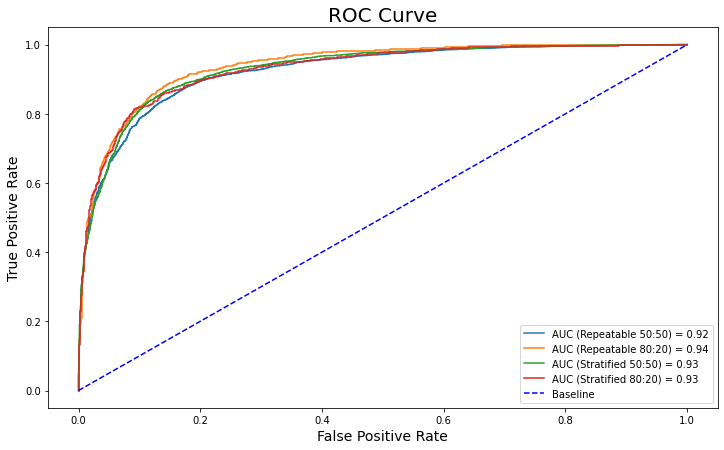

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

probs_m1 = xgb_model1.predict_proba(X_test1)[:, 1]
probs_m2 = xgb_model2.predict_proba(X_test2)[:, 1]
probs_m3 = xgb_model3.predict_proba(X_test3)[:, 1]
probs_m4 = xgb_model4.predict_proba(X_test4)[:, 1]


# y_test_int = y_test.replace({'Exited': 1, 'Not Exited': 0})
auc_mod1 = roc_auc_score(y_test1, probs_m1)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test1, probs_m1)

auc_mod2 = roc_auc_score(y_test2, probs_m2)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test2, probs_m2)

auc_mod3 = roc_auc_score(y_test3, probs_m3)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test3, probs_m3)

auc_mod4 = roc_auc_score(y_test4, probs_m4)
fpr_xg, tpr_xg, thresholds_xg = roc_curve(y_test4, probs_m4)

plt.figure(figsize=(12, 7))
plt.plot(fpr_lr, tpr_lr, label=f'AUC (Repeatable 50:50) = {auc_mod1:.2f}')
plt.plot(fpr_dt, tpr_dt, label=f'AUC (Repeatable 80:20) = {auc_mod2:.2f}')
plt.plot(fpr_rf, tpr_rf, label=f'AUC (Stratified 50:50) = {auc_mod3:.2f}')
plt.plot(fpr_xg, tpr_xg, label=f'AUC (Stratified 80:20) = {auc_mod4:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();